# Clustering Categorical Data 

You are given much more country data. Using the same methodology as the one in the lecture, group all the countries in 2 clusters. 

<b> Already done that? Okay! </b>
    
There are other features: name and continent. 

Encode the continent one and use it in the clustering solution. Think about the difference with the previous exercise.

## Import the relevant libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
sns.set()

## Load the data

Load data from the csv file: <i> 'Categorical.csv'</i>.

In [3]:
data = pd.read_csv('Categorical.csv')
data

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,Oceania
237,Yemen,47.586762,15.909280,Asia
238,South Africa,25.083901,-29.000341,Africa
239,Zambia,27.774759,-13.458242,Africa


## Map the data

Use the <i>'continent'</i> category for this analysis.

In [4]:
mapped_cont = data.copy()
mapped_cont['continent'] = mapped_cont['continent'].map({'North America':0,'Europe':1,'Asia':2,'Africa':3,'South America':4, 'Oceania':5,'Seven seas (open ocean)':6, 'Antarctica':7})
mapped_cont

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,0
1,Afghanistan,66.004734,33.835231,2
2,Angola,17.537368,-12.293361,3
3,Anguilla,-63.064989,18.223959,0
4,Albania,20.049834,41.142450,1
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,5
237,Yemen,47.586762,15.909280,2
238,South Africa,25.083901,-29.000341,3
239,Zambia,27.774759,-13.458242,3


## Select the features

In [5]:
# Features refer to the categorical data
feature = mapped_cont.iloc[:,3:4]
feature

,continent
0,0
1,2
2,3
3,0
4,1
...,...
236,5
237,2
238,3
239,3


## Clustering

Use 7 clusters.

In [23]:
kam = KMeans(7)
kam.fit(feature)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Clustering results

In [24]:
clusters = kam.fit_predict(feature)
clusters

array([0, 3, 1, 0, 4, 4, 4, 3, 6, 3, 5, 2, 5, 2, 0, 5, 4, 3, 1, 4, 1, 1,
       3, 4, 3, 0, 0, 4, 0, 4, 0, 0, 6, 6, 0, 3, 3, 1, 1, 4, 6, 3, 1, 1,
       1, 1, 5, 6, 1, 1, 0, 0, 0, 0, 3, 3, 4, 4, 1, 0, 4, 0, 1, 6, 1, 1,
       4, 4, 1, 4, 5, 6, 4, 4, 5, 1, 4, 3, 4, 1, 1, 1, 1, 1, 4, 0, 0, 0,
       5, 6, 3, 2, 0, 4, 0, 4, 3, 4, 3, 3, 2, 4, 3, 3, 4, 3, 4, 0, 4, 3,
       3, 3, 3, 1, 3, 3, 5, 0, 3, 4, 3, 3, 3, 1, 1, 0, 4, 3, 1, 4, 4, 4,
       3, 0, 1, 4, 4, 1, 2, 0, 5, 4, 1, 4, 3, 4, 3, 5, 1, 1, 0, 2, 1, 3,
       1, 5, 1, 5, 1, 0, 5, 4, 4, 3, 5, 5, 3, 3, 0, 5, 6, 3, 5, 5, 4, 0,
       3, 4, 6, 3, 5, 3, 4, 4, 1, 1, 3, 1, 1, 1, 3, 2, 2, 5, 1, 0, 4, 1,
       1, 0, 4, 1, 6, 4, 4, 4, 1, 0, 2, 3, 0, 1, 1, 3, 3, 3, 3, 5, 0, 1,
       3, 3, 1, 1, 4, 6, 0, 3, 4, 0, 6, 0, 0, 3, 5, 5, 5, 3, 1, 1, 1])

In [25]:
clustered_data = mapped_cont.copy()
clustered_data['Cluster'] = clusters
clustered_data

,name,Longitude,Latitude,continent,Cluster
0,Aruba,-69.982677,12.520880,0,0
1,Afghanistan,66.004734,33.835231,2,3
2,Angola,17.537368,-12.293361,3,1
3,Anguilla,-63.064989,18.223959,0,0
4,Albania,20.049834,41.142450,1,4
...,...,...,...,...,...
236,Samoa,-172.164851,-13.753243,5,5
237,Yemen,47.586762,15.909280,2,3
238,South Africa,25.083901,-29.000341,3,1
239,Zambia,27.774759,-13.458242,3,1


## Plot the data

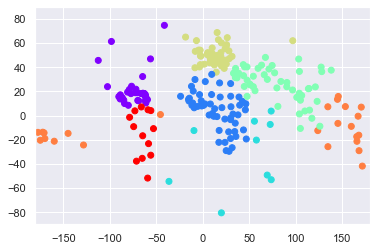

In [26]:
plt.scatter(data['Longitude'], data['Latitude'],c=clustered_data['Cluster'], cmap = 'rainbow')
plt.xlim(-180,180)
plt.ylim(-90, 90)
plt.show()